In [10]:
from __future__ import annotations

import numpy as np
import pandas as pd

import scanpy as sc
import anndata as ad
import decoupler
import seaborn.objects as so
from pathlib import Path
import session_info

In [45]:
adata.var_names

Index(['Samd11', 'Noc2l', 'Klhl17', 'Plekhn1', 'Perm1', 'Isg15', 'Agrn',
       'Rnf223', '9430015G10Rik', 'Ttll10',
       ...
       'F8a', 'Fundc2', 'Cmc4', 'Mtcp1', 'Brcc3', 'Vbp1', 'Tmlhe', 'Spry3',
       'Vamp7', 'Il9r'],
      dtype='object', name='GENES', length=13728)

In [2]:
adata=sc.read("../important_processed_data/4.7_gingival_st_bayes.h5ad")

In [5]:
def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [29]:
adata.obsm

AxisArrays with keys: X_pca, X_umap, spatial, aucell_estimate

In [11]:
go = gmt_to_decoupler("../data/m5.all.v2023.2.Mm.symbols (3).gmt")

In [291]:
set(go['genesymbol'][go["geneset"].isin(filtered_strings)])

{'1700123M08Rik',
 '1810014B01Rik',
 '2210409D07Rik',
 '2310040G24Rik',
 '2310075C17Rik',
 '2810403D21Rik',
 '3300005D01Rik',
 '4833427F10Rik',
 '5430416N02Rik',
 '5730416F02Rik',
 'A330069E16Rik',
 'AI506816',
 'Abhd2',
 'Abi3bp',
 'Actg1',
 'Acvrl1',
 'Adam17',
 'Adamts13',
 'Adamts18',
 'Adipor2',
 'Adra2a',
 'Adra2b',
 'Adra2c',
 'Adtrp',
 'Ahnak',
 'Ajap1',
 'Ajuba',
 'Alox12',
 'Alox15',
 'Alox5',
 'Ano6',
 'Anxa1',
 'Anxa2',
 'Anxa5',
 'Anxa6',
 'Anxa8',
 'Ap3b1',
 'Apoa1',
 'Apoe',
 'Apoh',
 'Aqp1',
 'Arfgef1',
 'Arhgap24',
 'Arhgap35',
 'Arhgef19',
 'Arl8b',
 'Atp7a',
 'Aurka',
 'Axl',
 'B4galt1',
 'BC004004',
 'Bax',
 'Bcl2',
 'Bex1',
 'Bloc1s3',
 'Bloc1s4',
 'Bloc1s6',
 'Bnc1',
 'Braf',
 'C1galt1c1',
 'C1qtnf1',
 'Cadm4',
 'Carmil2',
 'Cask',
 'Casp3',
 'Casp7',
 'Cav1',
 'Cav3',
 'Ccl2',
 'Ccm2l',
 'Ccn1',
 'Ccn4',
 'Ccr2',
 'Cd109',
 'Cd151',
 'Cd24a',
 'Cd36',
 'Cd40lg',
 'Cd44',
 'Cd9',
 'Cdkn1a',
 'Ceacam1',
 'Celsr1',
 'Cers2',
 'Cfh',
 'Cflar',
 'Chmp1a',
 'Chmp1b',
 

In [13]:
decoupler.run_aucell(
    adata,
    go,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

In [278]:
adata.obsm["aucell_estimate"].columns

Index(['GOBP_2FE_2S_CLUSTER_ASSEMBLY', 'GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS',
       'GOBP_3_UTR_MEDIATED_MRNA_DESTABILIZATION',
       'GOBP_3_UTR_MEDIATED_MRNA_STABILIZATION',
       'GOBP_5_PHOSPHORIBOSE_1_DIPHOSPHATE_METABOLIC_PROCESS',
       'GOBP_7_METHYLGUANOSINE_RNA_CAPPING', 'GOBP_ABSCISSION',
       'GOBP_ACETYL_COA_BIOSYNTHETIC_PROCESS',
       'GOBP_ACETYL_COA_BIOSYNTHETIC_PROCESS_FROM_PYRUVATE',
       'GOBP_ACETYL_COA_METABOLIC_PROCESS',
       ...
       'MP_INCREASED_TRIGEMINAL_NEUROMA_INCIDENCE',
       'MP_INCREASED_TUMOR_GROWTH_SIZE', 'MP_INCREASED_TUMOR_INCIDENCE',
       'MP_INCREASED_TUMOR_LATENCY',
       'MP_INCREASED_TUMOR_NECROSIS_FACTOR_SECRETION',
       'MP_INCREASED_T_CELL_DERIVED_LYMPHOMA_INCIDENCE',
       'MP_INCREASED_UTERUS_LEIOMYOMA_INCIDENCE',
       'MP_INCREASED_UTERUS_TUMOR_INCIDENCE', 'MP_PRENEOPLASIA',
       'MP_TUMOR_REGRESSION'],
      dtype='object', name='source', length=9025)

In [279]:
filtered_strings = [s for s in adata.obsm["aucell_estimate"].columns if "WOUND" in s]

In [280]:
filtered_strings

['GOBP_ANGIOGENESIS_INVOLVED_IN_WOUND_HEALING',
 'GOBP_CONNECTIVE_TISSUE_REPLACEMENT_INVOLVED_IN_INFLAMMATORY_RESPONSE_WOUND_HEALING',
 'GOBP_INFLAMMATORY_RESPONSE_TO_WOUNDING',
 'GOBP_NEGATIVE_REGULATION_OF_RESPONSE_TO_WOUNDING',
 'GOBP_NEGATIVE_REGULATION_OF_WOUND_HEALING',
 'GOBP_POSITIVE_REGULATION_OF_EPITHELIAL_CELL_PROLIFERATION_INVOLVED_IN_WOUND_HEALING',
 'GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_WOUNDING',
 'GOBP_POSITIVE_REGULATION_OF_VASCULAR_WOUND_HEALING',
 'GOBP_POSITIVE_REGULATION_OF_WOUND_HEALING',
 'GOBP_REGULATION_OF_INFLAMMATORY_RESPONSE_TO_WOUNDING',
 'GOBP_REGULATION_OF_RESPONSE_TO_WOUNDING',
 'GOBP_REGULATION_OF_VASCULAR_WOUND_HEALING',
 'GOBP_REGULATION_OF_WOUND_HEALING',
 'GOBP_REGULATION_OF_WOUND_HEALING_SPREADING_OF_EPIDERMAL_CELLS',
 'GOBP_RESPONSE_TO_WOUNDING',
 'GOBP_VASCULAR_WOUND_HEALING',
 'GOBP_WOUND_HEALING',
 'GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE',
 'GOBP_WOUND_HEALING_SPREADING_OF_EPIDERMAL_CELLS']

In [16]:
woundPathway=["GOBP_RESPONSE_TO_WOUNDING","GOBP_VASCULAR_WOUND_HEALING","GOBP_WOUND_HEALING","GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE"]

In [17]:
woundPathway=["GOBP_RESPONSE_TO_WOUNDING","GOBP_VASCULAR_WOUND_HEALING","GOBP_WOUND_HEALING","GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE"]
adata.obs[woundPathway] = adata.obsm["aucell_estimate"][woundPathway]

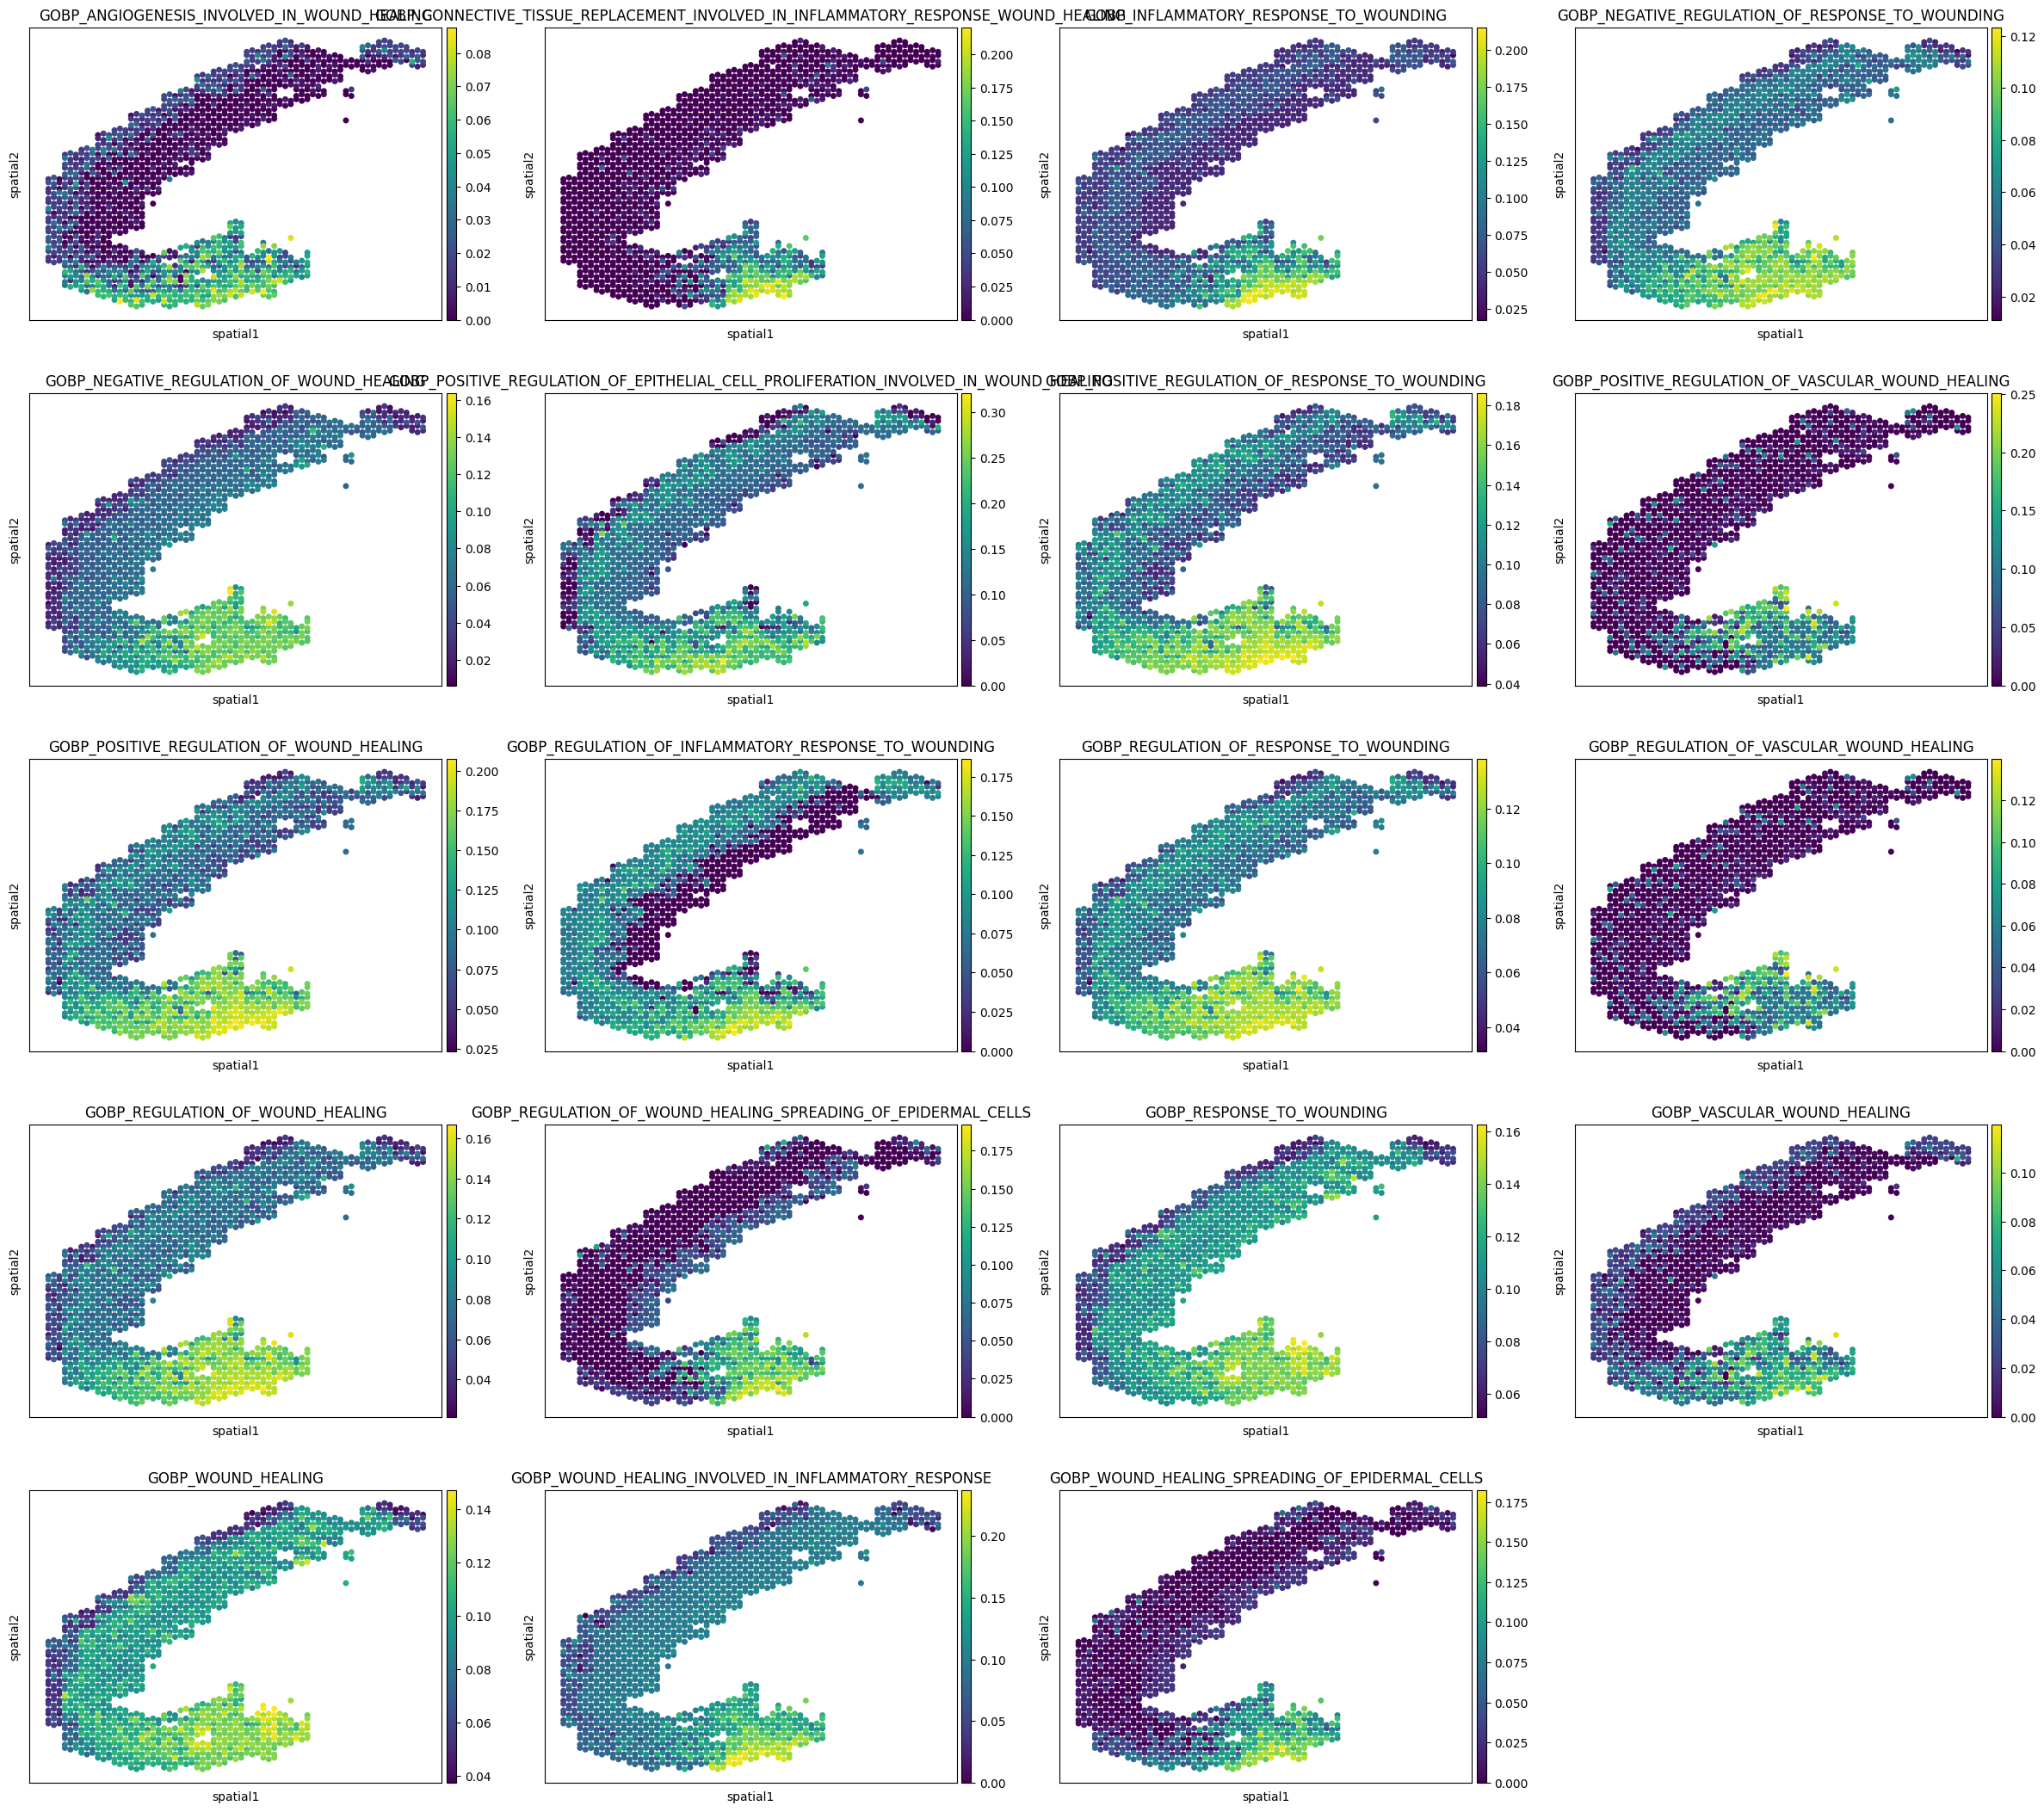

In [282]:
adata.obs[filtered_strings] = adata.obsm["aucell_estimate"][filtered_strings]
sc.pl.embedding(adata,color=filtered_strings,basis="spatial",size=100)

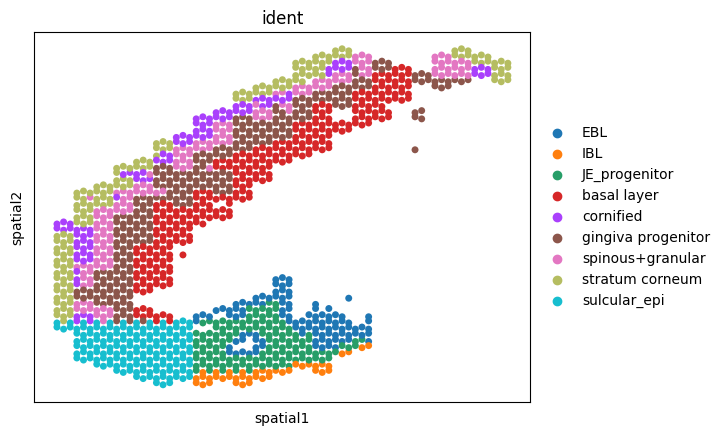

In [294]:
sc.pl.embedding(adata,color="ident",basis="spatial",size=100)

In [292]:
adata

AnnData object with n_obs × n_vars = 1447 × 13728
    obs: 'in_tissue', 'array_row', 'array_col', 'ident', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7', 'GOBP_RESPONSE_TO_WOUNDING', 'GOBP_VASCULAR_WOUND_HEALING', 'GOBP_WOUND_HEALING', 'GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE', 'Cell', 'GOBP_ANGIOGENESIS_INVOLVED_IN_WOUND_HEALING', 'GOBP_CONNECTIVE_TISSUE_REPLACEMENT_INVOLVED_IN_INFLAMMATORY_RESPONSE_WOUND_HEALING', 'GOBP_INFLAMMATORY_RESPONSE_TO_WOUNDING', 'GOBP_NEGATIVE_REGULATION_OF_RESPONSE_TO_WOUNDING', 'GOBP_NEGATIVE_REGULATION_OF_WOUND_HEALING', 'GOBP_POSITIVE_REGULATION_OF_EPITHELIAL_CELL_PROLIFERATION_INVOLVED_IN_WOUND_HEALING', 'GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_WOUNDING', 'GOBP_POSITIVE_REGULATION_OF_VASCULAR_WOUND_HEALING', 'GOBP_POSITIVE_REGULATION_OF_WOUND_HEALING', 'GOBP_REGULATION_OF_INFLAMMATORY_RESPONSE_TO_WOUNDING', 'GOBP_REGULATION_OF_RESPONSE_TO_WOUNDING', 'GOBP_REGULATION_OF_VASCULAR_WOUND

In [ ]:
sc.pl.embedding(adata,color=woundPathway,basis="spatial",size=100)

In [44]:
adata.obsm["aucell_estimate"].to_csv("../processed_data/6.14_aucell_spot.csv")

In [46]:
scGingival=sc.read("../important_processed_data/4.7_scMerge.h5ad")

In [48]:
adata

AnnData object with n_obs × n_vars = 1447 × 13728
    obs: 'in_tissue', 'array_row', 'array_col', 'ident', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7', 'GOBP_RESPONSE_TO_WOUNDING', 'GOBP_VASCULAR_WOUND_HEALING', 'GOBP_WOUND_HEALING', 'GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'pattern', 'membership'
    uns: 'hvg', 'ident_colors', 'ident_nhood_enrichment', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'aucell_estimate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [50]:
decoupler.run_aucell(
    scGingival,
    go,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

In [51]:
scGingival.obs[woundPathway] = scGingival.obsm["aucell_estimate"][woundPathway]

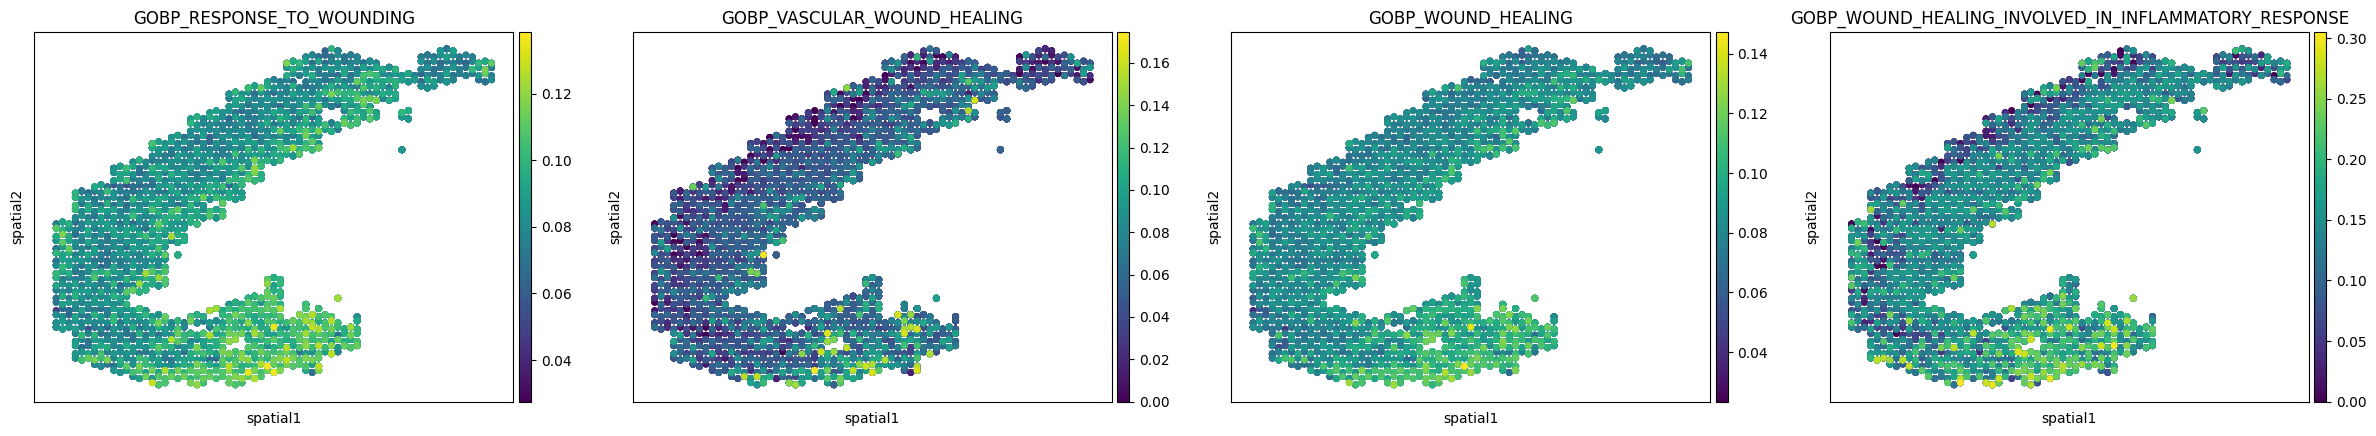

In [52]:
sc.pl.embedding(scGingival,color=woundPathway,basis="spatial",size=100)

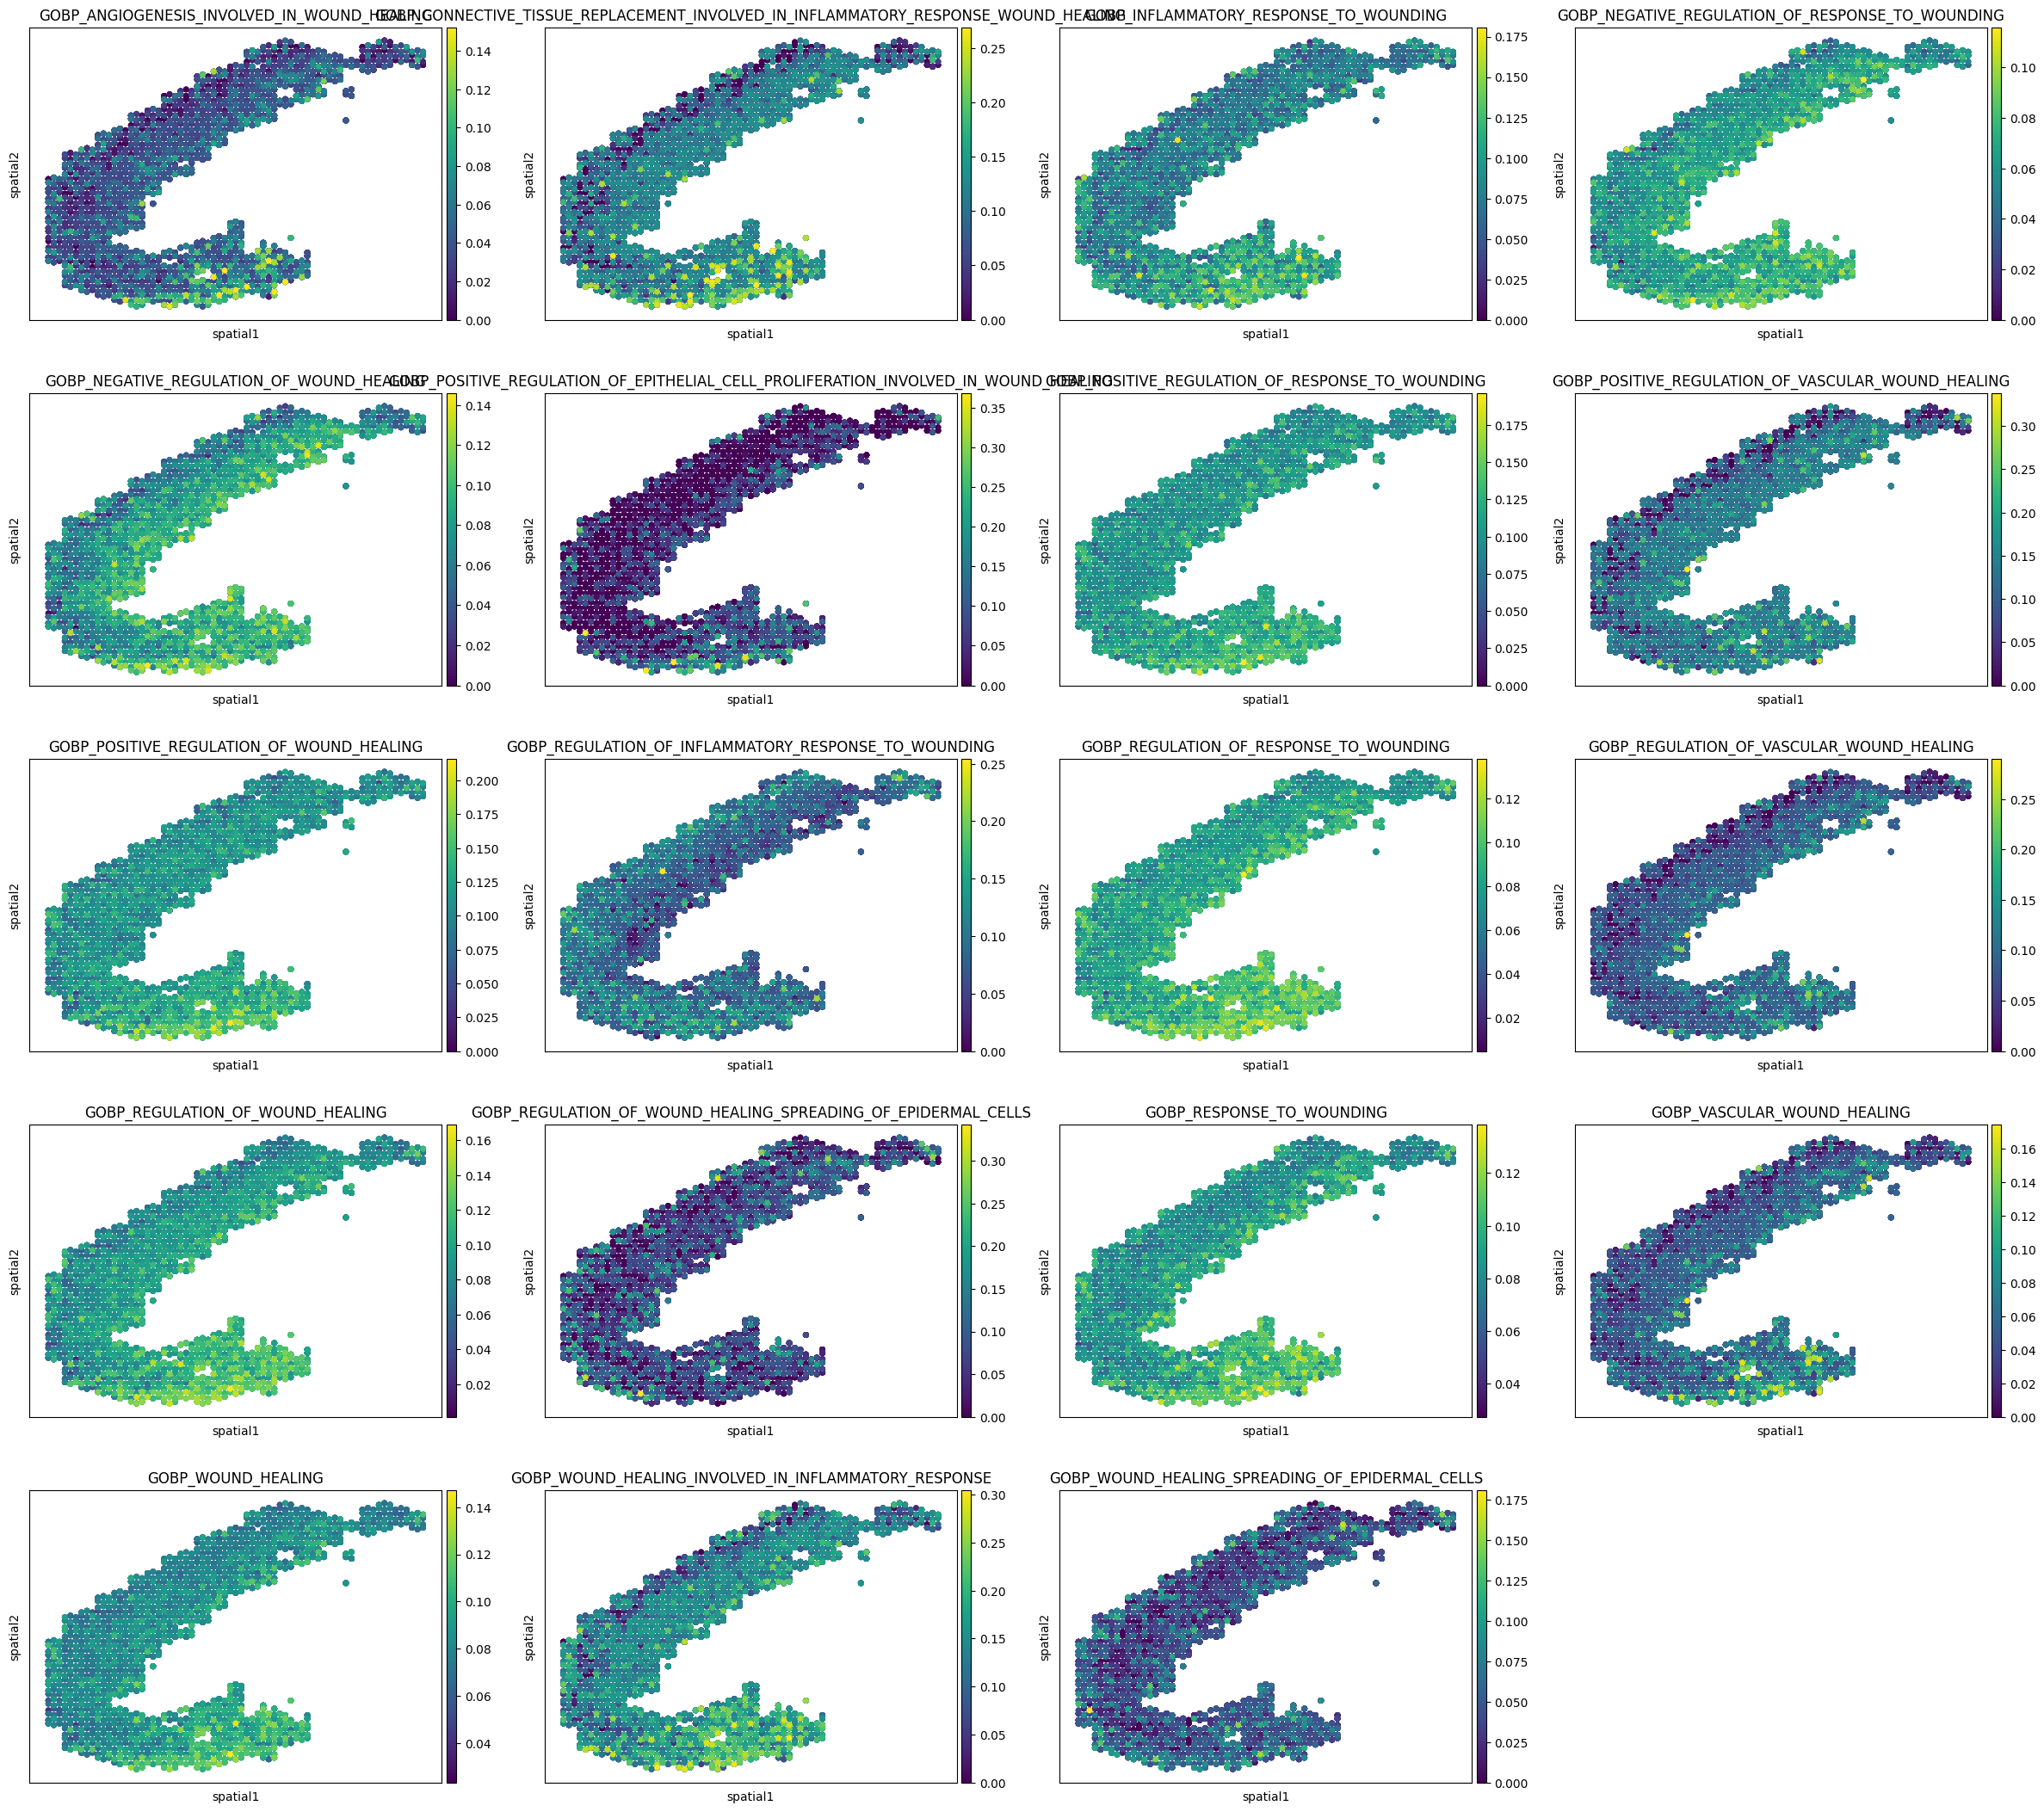

In [283]:
scGingival.obs[filtered_strings] = scGingival.obsm["aucell_estimate"][filtered_strings]
sc.pl.embedding(scGingival,color=filtered_strings,basis="spatial",size=100)

In [62]:
scGingival.obs["orig.ident"]

UCID0000_D0                  D0
UCID0001_D0                  D0
UCID0002_D0                  D0
UCID0003_D0                  D0
UCID0004_D0                  D0
                        ...    
UCID6523_D0_K5_GFP    D0_K5_GFP
UCID6524_D5_K5_GFP    D5_K5_GFP
UCID6525_D3_K5_GFP    D3_K5_GFP
UCID6526_D0_K5_GFP    D0_K5_GFP
UCID6527_D3_K5_GFP    D3_K5_GFP
Name: orig.ident, Length: 13056, dtype: category
Categories (6, object): ['D0', 'D0_K5_GFP', 'D3', 'D3_K5_GFP', 'D5', 'D5_K5_GFP']

In [63]:
D3 = scGingival[scGingival.obs["orig.ident"].isin(["D3","D3_K5_GFP"])]

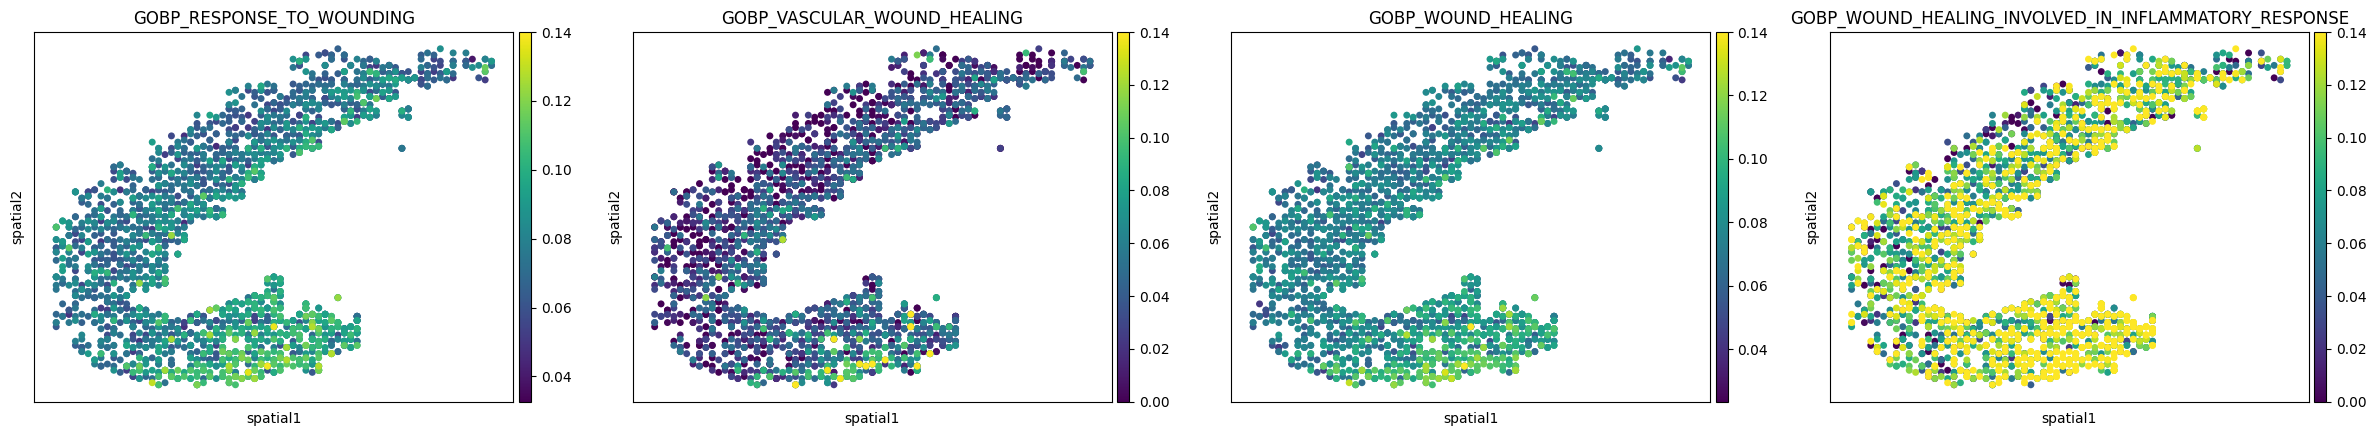

In [297]:
sc.pl.embedding(D3,color=woundPathway,basis="spatial",size=100,vmax=0.14)

In [65]:
D0 = scGingival[scGingival.obs["orig.ident"].isin(["D0","D0_K5_GFP"])]

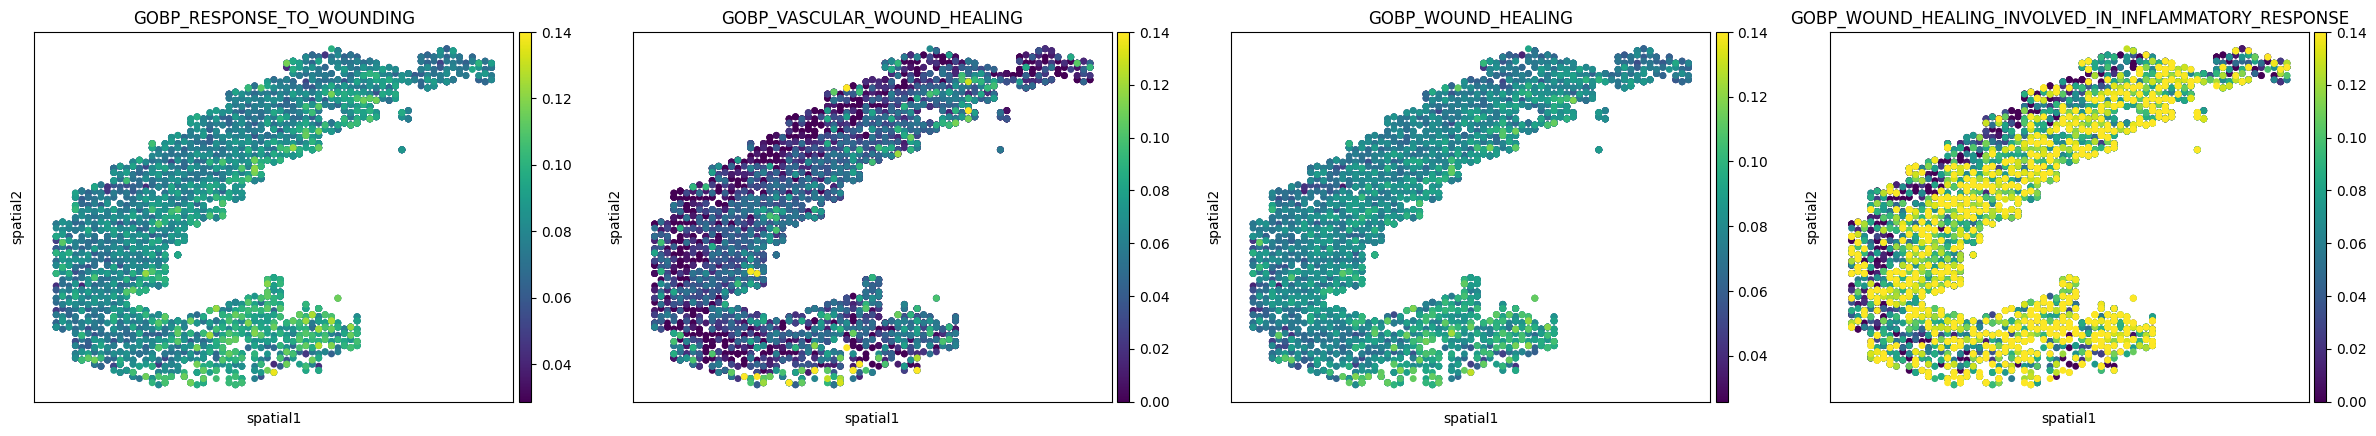

In [298]:
sc.pl.embedding(D0,color=woundPathway,basis="spatial",size=100,vmax=0.14)

In [67]:
D5 = scGingival[scGingival.obs["orig.ident"].isin(["D5","D5_K5_GFP"])]

In [299]:
sc.pl.embedding(D5,color=woundPathway,basis="spatial",size=100,vmax=0.14)

In [73]:
scGingival.obsm["aucell_estimate"].to_csv("../processed_data/6.14_aucell_spot_mouse.csv").var_names

AttributeError: 'NoneType' object has no attribute 'var_names'

In [335]:
scGingival.obs[filtered_strings].to_csv("../processed_data/6.18_aucell_3_stage_meta.csv")

In [ ]:
def getAttribute(adata,axis_key, sampleKey, subsetDict,njob = -1, cell_threshold = 40):
    adata.obs["Cell"]=adata.obs_names
    result_df = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
    sampleDict = dict(zip(result_df[sampleKey], result_df['Cell']))
    dptValue=adata.obs[peudotime_key]
    #prepare pseudotime bin
    timeDict=pd.DataFrame(dptValue).iloc[:,0].to_dict()
    num_bins = 10
    hist, bin_edges = np.histogram(dptValue, bins=num_bins)
    timeBin=np.digitize(dptValue, bin_edges)
    timeBin=pd.DataFrame(timeBin)
    timeBin.index=dptValue.index
    timeBin[timeBin==11]=10
    timeBin=timeBin.squeeze().to_dict()
    dfs = pd.DataFrame()
    df=adata.obs[sampleKey]
    for i in lineage:
        keyDf=pd.DataFrame(df.unique(),columns=["sample"])
        keyDf["Lineage"]=i
        dfs=pd.concat([dfs,keyDf])
    key_pairs= [(dfs['sample'].iloc[i], dfs['Lineage'].iloc[i]) for i in range(dfs.shape[0])]
    partial_process_subset = partial(process_subset, sampleDict=sampleDict, lineageDict=lineageDict, adata=adata,
     timeDict=timeDict, timeBin=timeBin, cell_threshold=cell_threshold)
    results = Parallel(n_jobs=njobs)(delayed(partial_process_subset)(*key_pair) for key_pair in tqdm(key_pairs))
    pearson_results = [result[0] for result in results if result is not None]
    peak_results = [result[1] for result in results if result is not None]
    expr_results = [result[2] for result in results if result is not None]

    # Combine the results into the final DataFrame
    corr = pd.concat(pearson_results, axis=1)
    peak = pd.concat(peak_results, axis=1)
    expr = pd.concat(expr_results, axis=1)
    #=form mudata
    exprAdata=sc.AnnData(expr.T)
    peakAdata=sc.AnnData(peak.T)
    corrAdata=sc.AnnData(corr.T)
    corr_mod = np.where(corr >= 0, np.sqrt(corr), -np.sqrt(-corr))
    corr_mod=pd.DataFrame(corr_mod)
    corr_mod.columns=corr_mod.columns
    corr_mod.index=corr_mod.index
    expr_mod = expr.apply(lambda row: (row) / (row.max()), axis=1)
    exprAdata=sc.AnnData(expr.T)
    peakAdata=sc.AnnData(peak.T)
    corrAdata=sc.AnnData(corr.T)
    exprAdata.layers["mod"]=expr_mod.T
    peakAdata.layers["mod"]=peak.T
    corrAdata.layers["mod"]=corr_mod.T
    tvmap=mu.MuData({"corr":corrAdata, "expr": exprAdata,"peak":peakAdata})
    return(tvmap)

In [76]:
peudotime_key = "GOBP_VASCULAR_WOUND_HEALING"
subsetCell = adata.obs_names
dptValue=adata.obs[peudotime_key]
timeDict=pd.DataFrame(dptValue).iloc[:,0].to_dict()
num_bins = 10
hist, bin_edges = np.histogram(dptValue, bins=num_bins)
timeBin=np.digitize(dptValue, bin_edges)
timeBin=pd.DataFrame(timeBin)
timeBin.index=dptValue.index
timeBin[timeBin==11]=10
timeBin=timeBin.squeeze().to_dict()

In [183]:
adata[subsetCell,['Samd11', 'Noc2l', 'Klhl17']]

View of AnnData object with n_obs × n_vars = 1447 × 3
    obs: 'in_tissue', 'array_row', 'array_col', 'ident', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7', 'GOBP_RESPONSE_TO_WOUNDING', 'GOBP_VASCULAR_WOUND_HEALING', 'GOBP_WOUND_HEALING', 'GOBP_WOUND_HEALING_INVOLVED_IN_INFLAMMATORY_RESPONSE'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'pattern', 'membership'
    uns: 'hvg', 'ident_colors', 'ident_nhood_enrichment', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'aucell_estimate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [328]:
from functools import partial
def process_gene(chunk,geneMat,gene_agg,varName,timeVal):
    pearsonCorrDict = {}
    maxRowsDict={}
    sumValuesDict={}
    for k in chunk:
        geneArr = geneMat.iloc[:, k]
        geneAggArr = gene_agg.iloc[:, k]
        if geneAggArr.sum() == 0:
            geneName = varName[k]
            maxRowsDict[geneName] = 0
            sumValuesDict[geneName] = 0
            pearsonCorrDict[geneName] = 0
        else:
            pearson, _ = pearsonr(geneArr, np.array(timeVal))
            geneName = varName[k]
            pearsonCorrDict[geneName] = pearson
            max_row = geneAggArr.idxmax()
            maxRowsDict[geneName] = max_row
            sumValuesDict[geneName] = geneAggArr.sum()
    return([maxRowsDict,sumValuesDict,pearsonCorrDict])

def process_subset(adata, timeDict,subsetCell:list = None, subsetGene:list = None,cell_threshold=40,njobs=1):
    if subsetGene is None:
        subsetGene=adata.var_names
    if subsetCell is None:
        subsetCell=adata.obs_names
    agg_dict = {gene: "mean" for gene in subsetGene}
    if len(subsetCell) < cell_threshold:
        return None
    subsetAdata = adata[subsetCell,subsetGene]
    # make bin dict
    dptValue = np.array(list(timeDict.values()))
    hist, bin_edges = np.histogram(dptValue, bins=num_bins)
    timeBin=np.digitize(dptValue, bin_edges)
    timeBin=pd.DataFrame(timeBin)
    timeBin.index=np.array(list(timeDict.keys()))
    timeBin[timeBin==11]=10
    timeBin=timeBin.squeeze().to_dict()
    timeVal = list(map(lambda val: timeDict[val], subsetCell))
    timeBinVal = list(map(lambda val: timeBin[val], subsetCell))
    geneMat = pd.DataFrame(subsetAdata.X.toarray())
    varName = subsetAdata.var_names
    geneMat.columns=subsetAdata.var_names
    geneMat.index=subsetAdata.obs_names
    geneMat["dpt_bin"]=np.array(timeBinVal)
    gene_agg = geneMat.groupby("dpt_bin").agg(agg_dict)
    bin_mask=geneMat.groupby("dpt_bin").size()<5
    gene_agg[bin_mask]=np.nan
    geneMat=geneMat.loc[:,varName]
    # chunk and parallel
    if njobs == -1:
        chunkSplit = 100
    else:
        chunkSplit=njobs
    chunk_size = geneMat.shape[1] // chunkSplit
    chunks = [range(i, min(i + chunk_size, geneMat.shape[1])) for i in range(0, geneMat.shape[1], chunk_size)]

    # Parallelize the computation
    partial_process_gene = partial(process_gene, geneMat=geneMat, gene_agg=gene_agg, varName=varName,timeVal=timeVal)
    results = Parallel(n_jobs=njobs)(delayed(partial_process_gene)(chunk) for chunk in chunks)
    res1 = [result[0] for result in results if result is not None]
    res2 = [result[1] for result in results if result is not None]
    res3 = [result[2] for result in results if result is not None]
    combined_dict = {}
    # Iterate over each dictionary in the list and update the combined dictionary
    for d in res1:
        combined_dict.update(d)
    peak = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['peak'])
    # Iterate over each dictionary in the list and update the combined dictionary
    for d in res2:
        combined_dict.update(d)
    expr = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['expr'])
    # Iterate over each dictionary in the list and update the combined dictionary
    for d in res3:
        combined_dict.update(d)
    corr = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['corr'])
    tripleDf = pd.concat([peak,expr,corr],axis=1)
  
    return tripleDf


In [215]:
sampleKey="ident"
adata.obs["Cell"]=adata.obs_names
sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
sampleDict = dict(zip(sampleDf[sampleKey], sampleDf['Cell']))

/tmp/ipykernel_2921173/2466673799.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()


In [266]:
from tqdm import tqdm
def getAttributeMini(adata,axis_key, sampleKey,subsetCell:list = None,subsetGene:list = None, njob = -1, cell_threshold = 40):
    # simply split by sample
    if subsetCell is None:
        subsetCell=adata.obs_names
    adata.obs["Cell"]=adata.obs_names
    sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
    sampleDict = dict(zip(sampleDf[sampleKey], sampleDf['Cell']))
    dptValue=adata.obs[axis_key]
    timeDict=pd.DataFrame(dptValue).iloc[:,0].to_dict()
    resDict = {}
    for i in tqdm(sampleDict.keys(), desc="Processing Samples"):
        selectCell = sampleDict[i]
        selectCell=np.intersect1d(selectCell,subsetCell)
        loopDf = process_subset(adata,subsetCell=selectCell,subsetGene=subsetGene,
                                timeDict=timeDict,cell_threshold=cell_threshold,njobs=njob)
        resDict[i] = loopDf
    tvMap = dict2Mudata(resDict)
    return(tvMap)

In [270]:
import muon as mu
def concat_results(resDict, key):
    return pd.concat([resDict[result][key] for result in resDict.keys()], axis=1, keys=resDict.keys())

def dict2Mudata(resDict):
    # Concatenate results for 'peak', 'expr', and 'corr'
    peak = concat_results(resDict, "peak")
    expr = concat_results(resDict, "expr")
    corr = concat_results(resDict, "corr")
    exprAdata=sc.AnnData(expr.T)
    peakAdata=sc.AnnData(peak.T)
    corrAdata=sc.AnnData(corr.T)
    exprAdata.layers["raw"] = exprAdata.X
    peakAdata.layers["raw"] = peakAdata.X
    corrAdata.layers["raw"] = corrAdata.X
    corr_mod = np.where(corr >= 0, np.sqrt(corr), -np.sqrt(-corr))
    corr_mod=pd.DataFrame(corr_mod)
    corr_mod.columns=corr_mod.columns
    corr_mod.index=corr_mod.index
    expr_mod = expr.apply(lambda row: (row) / (row.max()), axis=1)
    exprAdata=sc.AnnData(expr.T)
    peakAdata=sc.AnnData(peak.T)
    corrAdata=sc.AnnData(corr.T)
    exprAdata.layers["mod"]=expr_mod.T
    peakAdata.layers["mod"]=peak.T
    corrAdata.layers["mod"]=corr_mod.T
    tvmap=mu.MuData({"corr":corrAdata, "expr": exprAdata,"peak":peakAdata})
    return(tvmap)

In [271]:
test = getAttributeMini(adata,axis_key="GOBP_RESPONSE_TO_WOUNDING",
                       sampleKey="ident",njob=20)

/tmp/ipykernel_2921173/2543489826.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples: 100%|██████████| 9/9 [01:20<00:00,  8.92s/it]
/home/zhanglab/mambaforge/envs/py311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
/home/zhanglab/mambaforge/envs/py311/lib/python3.11/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [301]:
test = getAttributeMini(adata,axis_key="GOBP_RESPONSE_TO_WOUNDING",
                       sampleKey="ident",njob=-1)

/tmp/ipykernel_2921173/2543489826.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples: 100%|██████████| 9/9 [00:56<00:00,  6.33s/it]


ValueError: no types given

In [252]:
test_peak=[test[result]["peak"] for result in test.keys()]

In [257]:
testdf = pd.concat(test_peak,axis=1)
testdf.columns = test.keys()

In [260]:
sc.AnnData(testdf.T)

AnnData object with n_obs × n_vars = 9 × 13728

In [314]:
adata.var_names[1:50]

Index(['Noc2l', 'Klhl17', 'Plekhn1', 'Perm1', 'Isg15', 'Agrn', 'Rnf223',
       '9430015G10Rik', 'Ttll10', 'Tnfrsf18', 'Tnfrsf4', 'Sdf4', 'B3galt6',
       'C1qtnf12', 'Ube2j2', 'Acap3', 'Pusl1', 'Ints11', 'Cptp', 'Dvl1',
       'Mxra8', 'Aurkaip1', 'Ccnl2', 'Ankrd65', 'Tmem88b', 'Vwa1', 'Atad3a',
       'Tmem240', 'Ssu72', 'Fndc10', 'Mib2', 'Mmp23', 'Slc35e2', 'Nadk',
       'Gnb1', 'Tmem52', 'Gabrd', 'Prkcz', 'Faap20', 'Ski', 'Morn1', 'Rer1',
       'Pex10', 'Plch2', 'Pank4', 'Hes5', 'Tnfrsf14', 'Prxl2b', 'Prdm16'],
      dtype='object', name='GENES')

In [331]:
testDf = process_subset(adata,subsetCell=subsetCell,subsetGene=adata.var_names[1:200],timeDict=timeDict,cell_threshold=40,njobs=-1)

In [332]:
testDf

peak      expr      corr
Noc2l      10  0.245527 -0.104348
Klhl17     10  0.036991  0.713543
Plekhn1     3  0.439648 -0.025706
Perm1       0  0.000000  0.000000
Isg15      10  0.077095  0.579290
...       ...       ...       ...
Cdc42      10  2.034460  0.191471
Wnt4        1  0.100476 -0.656150
Zbtb40      9  0.074525 -0.165627
C1qa        4  0.058257 -0.103714
C1qc       10  0.575728  0.465377

[199 rows x 3 columns]

In [111]:
from threading import Lock
from collections import defaultdict
maxRowsLock = Lock()
sumValuesLock = Lock()
pearsonCorrLock = Lock()
def process_gene(k):
    geneArr = geneMat.iloc[:, k]
    geneAggArr = gene_agg.iloc[:, k]
    if geneAggArr.sum() == 0:
        geneName = varName[k]
        with maxRowsLock:
            maxRowsDict[geneName] = 0
        with sumValuesLock:
            sumValuesDict[geneName] = 0
        with pearsonCorrLock:
            pearsonCorrDict[geneName] = 0
    else:
        pearson, _ = pearsonr(geneArr, np.array(timeVal))
        geneName = varName[k]
        with pearsonCorrLock:
            pearsonCorrDict[geneName] = pearson
        with maxRowsLock:
            max_row = geneAggArr.idxmax()
            maxRowsDict[geneName] = max_row
        with sumValuesLock:
            sumValuesDict[geneName] = geneAggArr.sum()
    return([maxRowsDict,sumValuesDict,pearsonCorrDict])

In [152]:
res1 = [result[0] for result in results if result is not None]
res2 = [result[1] for result in results if result is not None]
res3 = [result[2] for result in results if result is not None]
combined_dict = {}
# Iterate over each dictionary in the list and update the combined dictionary
for d in res1:
    combined_dict.update(d)
peak = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['value'])
# Iterate over each dictionary in the list and update the combined dictionary
for d in res2:
    combined_dict.update(d)
expr = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['value'])
# Iterate over each dictionary in the list and update the combined dictionary
for d in res3:
    combined_dict.update(d)
corr = pd.DataFrame.from_dict(combined_dict,orient='index', columns=['value'])
tripleDf = pd.concat([peak,expr,corr],axis=1)

value     value     value
Samd11       0  0.000000  0.000000
Noc2l       10  0.245527 -0.104348
Klhl17      10  0.036991  0.713543
Plekhn1      3  0.439648 -0.025706
Perm1        0  0.000000  0.000000
...        ...       ...       ...
Vbp1         1  0.024639 -0.532696
Tmlhe        1  0.036556 -0.176357
Spry3        0  0.000000  0.000000
Vamp7        1  0.049695 -0.299186
Il9r         0  0.000000  0.000000

[13728 rows x 3 columns]

In [148]:
combined_dict = {}
res2 = [result[1] for result in results if result is not None]
# Iterate over each dictionary in the list and update the combined dictionary
for d in res2:
    combined_dict.update(d)
pd.DataFrame.from_dict(combined_dict,orient='index', columns=['value'])

value
Samd11   0.000000
Noc2l    0.245527
Klhl17   0.036991
Plekhn1  0.439648
Perm1    0.000000
...           ...
Vbp1     0.024639
Tmlhe    0.036556
Spry3    0.000000
Vamp7    0.049695
Il9r     0.000000

[13728 rows x 1 columns]

In [144]:
pd.DataFrame.from_dict(combined_dict,orient='index', columns=['value'])

value
Samd11       0
Noc2l       10
Klhl17      10
Plekhn1      3
Perm1        0
...        ...
Vbp1         1
Tmlhe        1
Spry3        0
Vamp7        1
Il9r         0

[13728 rows x 1 columns]